In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns

In [3]:
games_data=pd.read_csv('games.csv')
tracking_20=pd.read_csv('tracking2020.csv')
tracking_19=pd.read_csv('tracking2019.csv')
tracking_18=pd.read_csv('tracking2018.csv')
players_data=pd.read_csv('players.csv')
plays_data=pd.read_csv('plays.csv')
scout_data=pd.read_csv('PFFScoutingData.csv')

In [4]:
#Lets filter the plays DF to only look at punts

punts_data=plays_data[plays_data['specialTeamsPlayType']=='Punt']

#Now lets filter by plays which resulted in returns

punts_data=punts_data[punts_data['specialTeamsResult']=='Return']

#filter plays that didnt had a penalty

punts_data=punts_data[punts_data['penaltyCodes'].isnull()]

punts_data.shape

(1881, 25)

In [5]:
Punts_Ids=pd.DataFrame({'gameId':punts_data.gameId,'playId':punts_data.playId})

In [6]:
Punts_Ids=Punts_Ids.reset_index(drop=True)

In [7]:
##Lets create a Frame with the tracking data from the last 3 seasons
all_tracking=pd.concat([tracking_20,tracking_19,tracking_18])

In [8]:
#Merge with gameID also!!
punts_track=pd.merge(Punts_Ids,all_tracking,on=['playId','gameId'])

## Lets also filter a DF of the position of each player at the moment the punt is fielded##

In [9]:
received_punts=punts_track[punts_track['event']=='punt_received']

## Lets extract The Id of the returner in each play that was returned in 2018-2020##

In [10]:
top_returners=punts_data.returnerId.value_counts()

In [11]:
returners=pd.DataFrame({'nflId':top_returners.index,})

In [12]:
returners=returners.reset_index(drop=True)

In [13]:
returners.shape

(158, 1)

In [14]:
##print(returners[returners['nflId']=='44923;45555'])
##print(returners[returners['nflId']=='44029;46130'])

returners.drop(index=132,axis=0,inplace=True)
returners.drop(index=141,axis=0,inplace=True)


In [15]:
returners['nflId']=returners['nflId'].astype('int')

## Now i will create another frame with the position of only the returners in the moment the punt is fielded.##

In [16]:
tracking_returners=pd.merge(returners,received_punts,on='nflId')
tracking_returners.reset_index(drop=True)

,nflId,gameId,playId,time,x,y,s,a,dis,o,dir,event,displayName,jerseyNumber,position,team,frameId,playDirection
0,35527,2018091000,469,2018-09-10T23:30:04.900,84.18,9.38,0.66,2.57,0.07,300.58,109.57,punt_received,Andre Roberts,19.0,WR,away,81,right
1,35527,2018091000,1545,2018-09-11T00:23:24.900,45.33,25.78,2.69,2.78,0.26,59.26,11.99,punt_received,Andre Roberts,19.0,WR,away,77,left
2,35527,2018091000,2626,2018-09-11T01:30:34.300,86.54,9.03,2.57,0.99,0.26,267.57,149.31,punt_received,Andre Roberts,19.0,WR,away,74,right
3,35527,2018092000,1061,2018-09-21T01:07:20.300,36.91,43.70,3.34,2.59,0.33,124.95,243.78,punt_received,Andre Roberts,19.0,WR,away,73,left
4,35527,2018100706,1287,2018-10-07T17:59:27.300,75.24,45.13,0.91,5.92,0.09,249.61,122.44,punt_received,Andre Roberts,19.0,WR,home,76,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,43446,2020122100,120,2020-12-22T01:18:00.200,55.21,33.23,7.37,2.18,0.73,313.80,303.78,punt_received,LeShaun Sims,38.0,CB,home,82,left
3169,43446,2020122100,683,2020-12-22T01:46:51.100,43.90,16.43,6.20,3.79,0.64,202.49,256.10,punt_received,LeShaun Sims,38.0,CB,home,82,left
3170,43446,2021010303,3224,2021-01-03T20:40:48.300,35.08,43.02,7.44,1.78,0.75,284.25,251.70,punt_received,LeShaun Sims,38.0,CB,home,78,left
3171,43446,2021010303,3530,2021-01-03T20:55:02.800,73.69,23.15,6.51,2.18,0.65,176.96,213.52,punt_received,LeShaun Sims,38.0,CB,home,72,left


In [17]:
#Lets define a function to get the absolute distance to the sideline
def distance(x):
    if (x< 26.65):
        return x
    else:
        return abs(53-x)

In [18]:
#Lets define a new column that will have the absolute distance to the sideline and apply it to the whole y column with a lambda
tracking_returners['side_distance']=tracking_returners['y'].apply(lambda x:distance(x))
tracking_returners

,nflId,gameId,playId,time,x,y,s,a,dis,o,dir,event,displayName,jerseyNumber,position,team,frameId,playDirection,side_distance
0,35527,2018091000,469,2018-09-10T23:30:04.900,84.18,9.38,0.66,2.57,0.07,300.58,109.57,punt_received,Andre Roberts,19.0,WR,away,81,right,9.38
1,35527,2018091000,1545,2018-09-11T00:23:24.900,45.33,25.78,2.69,2.78,0.26,59.26,11.99,punt_received,Andre Roberts,19.0,WR,away,77,left,25.78
2,35527,2018091000,2626,2018-09-11T01:30:34.300,86.54,9.03,2.57,0.99,0.26,267.57,149.31,punt_received,Andre Roberts,19.0,WR,away,74,right,9.03
3,35527,2018092000,1061,2018-09-21T01:07:20.300,36.91,43.70,3.34,2.59,0.33,124.95,243.78,punt_received,Andre Roberts,19.0,WR,away,73,left,9.30
4,35527,2018100706,1287,2018-10-07T17:59:27.300,75.24,45.13,0.91,5.92,0.09,249.61,122.44,punt_received,Andre Roberts,19.0,WR,home,76,right,7.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,43446,2020122100,120,2020-12-22T01:18:00.200,55.21,33.23,7.37,2.18,0.73,313.80,303.78,punt_received,LeShaun Sims,38.0,CB,home,82,left,19.77
3169,43446,2020122100,683,2020-12-22T01:46:51.100,43.90,16.43,6.20,3.79,0.64,202.49,256.10,punt_received,LeShaun Sims,38.0,CB,home,82,left,16.43
3170,43446,2021010303,3224,2021-01-03T20:40:48.300,35.08,43.02,7.44,1.78,0.75,284.25,251.70,punt_received,LeShaun Sims,38.0,CB,home,78,left,9.98
3171,43446,2021010303,3530,2021-01-03T20:55:02.800,73.69,23.15,6.51,2.18,0.65,176.96,213.52,punt_received,LeShaun Sims,38.0,CB,home,72,left,23.15


In [19]:
##Lets create a data frame with all the returner infomation for each play ##

#First lets extract the gameid, playid and returner id from the data frame of the filtered punt plays
returners_frame=punts_data.loc[:,['gameId','playId','returnerId']]
returners_frame.drop(index=11195,axis=0,inplace=True)
returners_frame.drop(index=2394,axis=0,inplace=True)
returners_frame['returnerId']=returners_frame['returnerId'].astype('int')

##Now lets merge with the tracking data we have of the exact moment of the punt being fielded
##returner_position=pd.merge(returners_frame,received_punts,left_on=['returnerId','gameId','playId'],right_on=['nflId','gameId','playId'])
##complete_returns

In [20]:
returners_frame.shape

(1879, 3)

In [21]:
##Now lets merge with the tracking data we have of the exact moment of the punt being fielded
returner_position=pd.merge(returners_frame,received_punts,left_on=['returnerId','gameId','playId'],right_on=['nflId','gameId','playId'])
##complete_returns

In [22]:
returner_position

,gameId,playId,returnerId,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,playDirection
0,2018090600,2599,29957,2018-09-07T03:02:24.600,82.57,41.79,1.58,4.03,0.17,282.79,315.15,punt_received,29957.0,Darren Sproles,43.0,RB,home,77,right
1,2018090900,485,46532,2018-09-09T17:19:13.200,36.64,44.64,4.33,2.10,0.43,36.11,5.11,punt_received,46532.0,Janarion Grant,84.0,WR,home,78,left
2,2018090900,575,37228,2018-09-09T17:23:40.400,98.19,51.95,1.44,7.99,0.17,315.14,10.89,punt_received,37228.0,Jeremy Kerley,10.0,WR,away,91,right
3,2018090900,674,46532,2018-09-09T17:28:29.700,41.43,38.02,0.49,3.36,0.04,99.05,280.96,punt_received,46532.0,Janarion Grant,84.0,WR,home,83,left
4,2018090900,1136,46532,2018-09-09T17:47:22.600,79.88,28.06,3.04,2.86,0.29,242.44,209.12,punt_received,46532.0,Janarion Grant,84.0,WR,home,71,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,2021010315,175,45900,2021-01-03T21:29:30.400,30.25,30.82,2.73,2.86,0.26,124.05,176.48,punt_received,45900.0,River Cracraft,86.0,WR,home,80,left
1872,2021010315,928,46211,2021-01-03T21:59:53.000,86.97,41.59,1.91,3.40,0.19,253.43,30.97,punt_received,46211.0,D.J. Reed,29.0,FS,away,77,right
1873,2021010315,1479,45900,2021-01-03T22:23:15.500,93.55,11.14,1.29,4.10,0.12,294.32,67.04,punt_received,45900.0,River Cracraft,86.0,WR,home,81,right
1874,2021010315,2235,45900,2021-01-03T23:07:00.700,80.13,26.63,5.46,1.92,0.54,249.35,316.44,punt_received,45900.0,River Cracraft,86.0,WR,home,66,right


In [23]:
tracking_returners=tracking_returners.loc[:,['gameId','playId','nflId','displayName','x','y','team','side_distance']]
tracking_returners

,gameId,playId,nflId,displayName,x,y,team,side_distance
0,2018091000,469,35527,Andre Roberts,84.18,9.38,away,9.38
1,2018091000,1545,35527,Andre Roberts,45.33,25.78,away,25.78
2,2018091000,2626,35527,Andre Roberts,86.54,9.03,away,9.03
3,2018092000,1061,35527,Andre Roberts,36.91,43.70,away,9.30
4,2018100706,1287,35527,Andre Roberts,75.24,45.13,home,7.87
...,...,...,...,...,...,...,...,...
3168,2020122100,120,43446,LeShaun Sims,55.21,33.23,home,19.77
3169,2020122100,683,43446,LeShaun Sims,43.90,16.43,home,16.43
3170,2021010303,3224,43446,LeShaun Sims,35.08,43.02,home,9.98
3171,2021010303,3530,43446,LeShaun Sims,73.69,23.15,home,23.15


In [24]:
returner_position=returner_position.loc[:,['gameId','playId','returnerId','nflId','displayName','x','y','team']]
returner_position

,gameId,playId,returnerId,nflId,displayName,x,y,team
0,2018090600,2599,29957,29957.0,Darren Sproles,82.57,41.79,home
1,2018090900,485,46532,46532.0,Janarion Grant,36.64,44.64,home
2,2018090900,575,37228,37228.0,Jeremy Kerley,98.19,51.95,away
3,2018090900,674,46532,46532.0,Janarion Grant,41.43,38.02,home
4,2018090900,1136,46532,46532.0,Janarion Grant,79.88,28.06,home
...,...,...,...,...,...,...,...,...
1871,2021010315,175,45900,45900.0,River Cracraft,30.25,30.82,home
1872,2021010315,928,46211,46211.0,D.J. Reed,86.97,41.59,away
1873,2021010315,1479,45900,45900.0,River Cracraft,93.55,11.14,home
1874,2021010315,2235,45900,45900.0,River Cracraft,80.13,26.63,home


In [25]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [26]:
q = """SELECT c.*, r.displayName [returnerName], r.x [retX], r.y [retY]
       FROM received_punts c
       JOIN returner_position r
       ON c.gameId=r.gameId AND c.playId=r.playId AND c.team<>r.team
       Where r.nflId IS NOT NULL AND c.nflId IS NOT NULL
       ;"""

names = pysqldf(q)
names

,gameId,playId,time,x,y,s,a,dis,o,dir,...,nflId,displayName,jerseyNumber,position,team,frameId,playDirection,returnerName,retX,retY
0,2018090600,2599,2018-09-07T03:02:24.600,40.06,31.13,6.67,0.56,0.67,71.86,63.54,...,37267.0,Matt Bosher,5.0,P,away,77,right,Darren Sproles,82.57,41.79
1,2018090600,2599,2018-09-07T03:02:24.600,74.47,39.08,7.98,3.74,0.82,116.91,60.23,...,38707.0,Justin Bethel,28.0,CB,away,77,right,Darren Sproles,82.57,41.79
2,2018090600,2599,2018-09-07T03:02:24.600,60.70,25.88,8.93,0.55,0.89,73.21,72.67,...,40191.0,Kemal Ishmael,36.0,FS,away,77,right,Darren Sproles,82.57,41.79
3,2018090600,2599,2018-09-07T03:02:24.600,55.99,34.49,8.39,1.31,0.85,61.40,64.26,...,43716.0,Brian Poole,34.0,CB,away,77,right,Darren Sproles,82.57,41.79
4,2018090600,2599,2018-09-07T03:02:24.600,60.82,35.18,8.16,1.60,0.82,80.18,68.83,...,44080.0,Jeff Overbaugh,44.0,LS,away,77,right,Darren Sproles,82.57,41.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20631,2021010315,2497,2021-01-03T23:20:46.600,43.94,28.68,7.82,1.34,0.79,42.02,61.94,...,46218.0,Michael Dickson,4.0,P,away,80,right,River Cracraft,88.53,33.13
20632,2021010315,2497,2021-01-03T23:20:46.600,77.72,10.41,8.17,3.05,0.82,57.71,32.05,...,46392.0,Linden Stephens,34.0,DB,away,80,right,River Cracraft,88.53,33.13
20633,2021010315,2497,2021-01-03T23:20:46.600,73.62,34.45,8.99,1.80,0.91,105.60,72.25,...,47871.0,Cody Barton,57.0,MLB,away,80,right,River Cracraft,88.53,33.13
20634,2021010315,2497,2021-01-03T23:20:46.600,58.59,35.71,8.25,1.05,0.83,114.97,89.17,...,47925.0,Ben Burr-Kirven,55.0,OLB,away,80,right,River Cracraft,88.53,33.13


In [27]:
names["distance_defender"] = np.sqrt(((names["x"] - names["retX"])**2)+((names["y"] - names["retY"])**2))

In [28]:
names['side_distance']=names['retY'].apply(lambda x:distance(x))
names

,gameId,playId,time,x,y,s,a,dis,o,dir,...,jerseyNumber,position,team,frameId,playDirection,returnerName,retX,retY,distance_defender,side_distance
0,2018090600,2599,2018-09-07T03:02:24.600,40.06,31.13,6.67,0.56,0.67,71.86,63.54,...,5.0,P,away,77,right,Darren Sproles,82.57,41.79,43.826199,11.21
1,2018090600,2599,2018-09-07T03:02:24.600,74.47,39.08,7.98,3.74,0.82,116.91,60.23,...,28.0,CB,away,77,right,Darren Sproles,82.57,41.79,8.541317,11.21
2,2018090600,2599,2018-09-07T03:02:24.600,60.70,25.88,8.93,0.55,0.89,73.21,72.67,...,36.0,FS,away,77,right,Darren Sproles,82.57,41.79,27.044870,11.21
3,2018090600,2599,2018-09-07T03:02:24.600,55.99,34.49,8.39,1.31,0.85,61.40,64.26,...,34.0,CB,away,77,right,Darren Sproles,82.57,41.79,27.564223,11.21
4,2018090600,2599,2018-09-07T03:02:24.600,60.82,35.18,8.16,1.60,0.82,80.18,68.83,...,44.0,LS,away,77,right,Darren Sproles,82.57,41.79,22.732237,11.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20631,2021010315,2497,2021-01-03T23:20:46.600,43.94,28.68,7.82,1.34,0.79,42.02,61.94,...,4.0,P,away,80,right,River Cracraft,88.53,33.13,44.811501,19.87
20632,2021010315,2497,2021-01-03T23:20:46.600,77.72,10.41,8.17,3.05,0.82,57.71,32.05,...,34.0,DB,away,80,right,River Cracraft,88.53,33.13,25.160574,19.87
20633,2021010315,2497,2021-01-03T23:20:46.600,73.62,34.45,8.99,1.80,0.91,105.60,72.25,...,57.0,MLB,away,80,right,River Cracraft,88.53,33.13,14.968317,19.87
20634,2021010315,2497,2021-01-03T23:20:46.600,58.59,35.71,8.25,1.05,0.83,114.97,89.17,...,55.0,OLB,away,80,right,River Cracraft,88.53,33.13,30.050957,19.87


In [29]:
defender_distance=names.groupby(['gameId','playId']).distance_defender.min().to_frame()

In [30]:
defender_distance.reset_index(drop=False,inplace=True)
defender_distance

,gameId,playId,distance_defender
0,2018090600,2599,5.008193
1,2018090900,485,7.960226
2,2018090900,575,16.346477
3,2018090900,674,5.479599
4,2018090900,1136,11.773942
...,...,...,...
1871,2021010315,175,9.547398
1872,2021010315,928,10.898009
1873,2021010315,1479,4.525152
1874,2021010315,2235,18.401315


In [31]:
temporal=names.groupby(['gameId','playId']).side_distance.mean().to_frame().reset_index()
defender_distance=pd.merge(defender_distance,temporal,on=['gameId','playId'])
defender_distance

,gameId,playId,distance_defender,side_distance
0,2018090600,2599,5.008193,11.21
1,2018090900,485,7.960226,8.36
2,2018090900,575,16.346477,1.05
3,2018090900,674,5.479599,14.98
4,2018090900,1136,11.773942,24.94
...,...,...,...,...
1871,2021010315,175,9.547398,22.18
1872,2021010315,928,10.898009,11.41
1873,2021010315,1479,4.525152,11.14
1874,2021010315,2235,18.401315,26.63


## Here We're gonna start with the creation of a regression model ##

In [62]:
features=pd.merge(punts_data,scout_data,on=['gameId','playId'])


In [63]:
features=pd.merge(features,defender_distance,on=['gameId','playId'])
features

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType,distance_defender,side_distance
0,2018090600,2599,"(10:22) M.Bosher punts 46 yards to PHI 28, Cen...",3,4,16,ATL,Punt,Return,37267.0,...,NaN,ATL 54,NaN,ATL 83; ATL 28,PHI 57,NaN,PHI 29; PHI 37; PHI 32,CC,5.008193,11.21
1,2018090900,485,(7:25) (Punt formation) C.Bojorquez punts 46 y...,1,4,14,BUF,Punt,Return,46903.0,...,BUF 57,BUF 42,NaN,BUF 30; BUF 26,NaN,NaN,BAL 36; BAL 29; BAL 26,CC,7.960226,8.36
2,2018090900,575,(6:37) (Punt formation) S.Koch punts 63 yards ...,1,4,9,BAL,Punt,Return,31018.0,...,NaN,BAL 54,NaN,BAL 26; BAL 10,NaN,NaN,BUF 29; BUF 30; BUF 26,CFFG,16.346477,1.05
3,2018090900,674,(5:43) (Punt formation) C.Bojorquez punts 51 y...,1,4,7,BUF,Punt,Return,46903.0,...,BUF 57,BUF 18,NaN,BUF 30; BUF 26,NaN,NaN,BAL 36; BAL 26; BAL 25,CC,5.479599,14.98
4,2018090900,1136,(14:21) (Punt formation) C.Bojorquez punts 49 ...,2,4,13,BUF,Punt,Return,46903.0,...,NaN,BUF 57,NaN,BUF 30; BUF 26,BAL 36; BAL 37; BAL 49; BAL 54; BAL 56,NaN,BAL 28; BAL 26,CC,11.773942,24.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,2021010315,175,"(13:07) M.Dickson punts 47 yards to SF 20, Cen...",1,4,12,SEA,Punt,Return,46218.0,...,NaN,SEA 57,NaN,SEA 28; SEA 34,SF 53; SF 59,NaN,SF 17; SF 36; SF 41,CC,9.547398,22.18
1872,2021010315,928,"(:40) M.Wishnowsky punts 49 yards to SEA 23, C...",1,4,7,SF,Punt,Return,47893.0,...,NaN,SF 17,NaN,SF 26; SF 17,NaN,NaN,SEA 21; SEA 34,CC,10.898009,11.41
1873,2021010315,1479,"(6:47) M.Dickson punts 61 yards to SF 16, Cent...",2,4,19,SEA,Punt,Return,46218.0,...,NaN,SEA 57,NaN,SEA 19; SEA 34,NaN,SF 36,SF 17; SF 41,CC,4.525152,11.14
1874,2021010315,2235,"(8:39) M.Dickson punts 43 yards to SF 30, Cent...",3,4,8,SEA,Punt,Return,46218.0,...,NaN,SEA 04,NaN,SEA 19; SEA 34,NaN,SF 36,SF 17; SF 41,CC,18.401315,26.63


In [64]:
features=features.drop(['specialTeamsPlayType','playDescription','specialTeamsResult','kickBlockerId','penaltyCodes','penaltyJerseyNumbers','penaltyYards','passResult','playResult','yardlineSide','down'],axis=1)
features=features.drop(['missedTackler','assistTackler','tackler','kickoffReturnFormation','gunners','puntRushers','specialTeamsSafeties','vises','kickContactType'],axis=1)
features.columns

Index(['gameId', 'playId', 'quarter', 'yardsToGo', 'possessionTeam',
       'kickerId', 'returnerId', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'kickLength',
       'kickReturnYardage', 'absoluteYardlineNumber', 'snapDetail', 'snapTime',
       'operationTime', 'hangTime', 'kickType', 'kickDirectionIntended',
       'kickDirectionActual', 'returnDirectionIntended',
       'returnDirectionActual', 'distance_defender', 'side_distance'],
      dtype='object')

In [35]:
X=features.drop(['kickReturnYardage','playId','gameId','possessionTeam','kickerId','returnerId','gameClock','quarter','preSnapHomeScore','preSnapVisitorScore','kickDirectionIntended','kickDirectionActual','returnDirectionIntended','returnDirectionActual'],axis=1)

In [36]:
X.columns

Index(['yardsToGo', 'yardlineNumber', 'kickLength', 'absoluteYardlineNumber',
       'snapDetail', 'snapTime', 'operationTime', 'hangTime', 'kickType',
       'distance_defender', 'side_distance'],
      dtype='object')

In [37]:
y=features['kickReturnYardage']

In [38]:
#Making sure the y value is taken as an int
np.where(np.isnan(y))
y=np.nan_to_num(y)

In [39]:
X

,yardsToGo,yardlineNumber,kickLength,absoluteYardlineNumber,snapDetail,snapTime,operationTime,hangTime,kickType,distance_defender,side_distance
0,16,26,46.0,36,OK,0.86,2.35,4.16,N,5.008193,11.21
1,14,28,46.0,82,OK,0.80,2.11,4.34,N,7.960226,8.36
2,9,26,63.0,36,OK,0.80,2.15,4.20,A,16.346477,1.05
3,7,18,51.0,92,OK,0.80,2.03,4.78,N,5.479599,14.98
4,13,22,49.0,32,OK,0.82,2.05,3.62,N,11.773942,24.94
...,...,...,...,...,...,...,...,...,...,...,...
1871,12,33,47.0,77,OK,0.84,2.05,4.62,N,9.547398,22.18
1872,7,28,49.0,38,OK,0.90,2.06,4.43,N,10.898009,11.41
1873,19,23,61.0,33,OK,0.79,2.07,4.80,N,4.525152,11.14
1874,8,27,43.0,37,OK,0.79,2.08,3.36,N,18.401315,26.63


In [40]:
## Getting dummy variables for our categorical columns like snap type
X_dum=pd.get_dummies(X.snapDetail,drop_first=True,prefix='snap')
X_dum

,snap_>,snap_H,snap_L,snap_OK
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
1871,0,0,0,1
1872,0,0,0,1
1873,0,0,0,1
1874,0,0,0,1


In [41]:
X=X.drop('snapDetail',axis=1)
X=pd.concat([X,X_dum],axis=1)
X

,yardsToGo,yardlineNumber,kickLength,absoluteYardlineNumber,snapTime,operationTime,hangTime,kickType,distance_defender,side_distance,snap_>,snap_H,snap_L,snap_OK
0,16,26,46.0,36,0.86,2.35,4.16,N,5.008193,11.21,0,0,0,1
1,14,28,46.0,82,0.80,2.11,4.34,N,7.960226,8.36,0,0,0,1
2,9,26,63.0,36,0.80,2.15,4.20,A,16.346477,1.05,0,0,0,1
3,7,18,51.0,92,0.80,2.03,4.78,N,5.479599,14.98,0,0,0,1
4,13,22,49.0,32,0.82,2.05,3.62,N,11.773942,24.94,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,12,33,47.0,77,0.84,2.05,4.62,N,9.547398,22.18,0,0,0,1
1872,7,28,49.0,38,0.90,2.06,4.43,N,10.898009,11.41,0,0,0,1
1873,19,23,61.0,33,0.79,2.07,4.80,N,4.525152,11.14,0,0,0,1
1874,8,27,43.0,37,0.79,2.08,3.36,N,18.401315,26.63,0,0,0,1


In [42]:

X=X.drop('kickType',axis=1)


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876 entries, 0 to 1875
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yardsToGo               1876 non-null   int64  
 1   yardlineNumber          1876 non-null   int64  
 2   kickLength              1876 non-null   float64
 3   absoluteYardlineNumber  1876 non-null   int64  
 4   snapTime                1876 non-null   float64
 5   operationTime           1876 non-null   float64
 6   hangTime                1875 non-null   float64
 7   distance_defender       1876 non-null   float64
 8   side_distance           1876 non-null   float64
 9   snap_>                  1876 non-null   uint8  
 10  snap_H                  1876 non-null   uint8  
 11  snap_L                  1876 non-null   uint8  
 12  snap_OK                 1876 non-null   uint8  
dtypes: float64(6), int64(3), uint8(4)
memory usage: 153.9 KB


In [44]:
X2=X.drop(['distance_defender','side_distance'],axis=1)

In [143]:
X['hangTime']=X['hangTime'].fillna(X.hangTime.mean())

In [46]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876 entries, 0 to 1875
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yardsToGo               1876 non-null   int64  
 1   yardlineNumber          1876 non-null   int64  
 2   kickLength              1876 non-null   float64
 3   absoluteYardlineNumber  1876 non-null   int64  
 4   snapTime                1876 non-null   float64
 5   operationTime           1876 non-null   float64
 6   hangTime                1876 non-null   float64
 7   snap_>                  1876 non-null   uint8  
 8   snap_H                  1876 non-null   uint8  
 9   snap_L                  1876 non-null   uint8  
 10  snap_OK                 1876 non-null   uint8  
dtypes: float64(4), int64(3), uint8(4)
memory usage: 124.6 KB


In [151]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [152]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [157]:
X_scaled

array([[0.375     , 0.51020408, 0.5942029 , ..., 0.        , 0.        ,
        1.        ],
       [0.325     , 0.55102041, 0.5942029 , ..., 0.        , 0.        ,
        1.        ],
       [0.2       , 0.51020408, 0.84057971, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.45      , 0.44897959, 0.8115942 , ..., 0.        , 0.        ,
        1.        ],
       [0.175     , 0.53061224, 0.55072464, ..., 0.        , 0.        ,
        1.        ],
       [0.2       , 0.51020408, 0.68115942, ..., 0.        , 0.        ,
        1.        ]])

In [153]:
lr=LinearRegression()

In [167]:
lr.fit(X,y)

LinearRegression()

In [168]:
importance=lr.coef_

In [158]:
features_importance= pd.DataFrame({'Feature':X.columns,'Coef':importance})
features_importance.sort_values(by='Coef',ascending=False)

,Feature,Coef
2,kickLength,18.596052
7,distance_defender,13.764022
4,snapTime,4.797453
8,side_distance,1.413418
0,yardsToGo,1.070319
3,absoluteYardlineNumber,-0.589480
1,yardlineNumber,-1.740282
5,operationTime,-2.071566
6,hangTime,-4.517455
9,snap_>,-6.301180


In [169]:
predict=lr.predict(X)

In [163]:
from sklearn import metrics


In [170]:
print('MAE',metrics.mean_absolute_error(y,predict))
print('MSE',np.sqrt(metrics.mean_squared_error(y,predict)))

MAE 6.358586457587419
MSE 10.435844673070905


In [55]:
#The R2 is quite low
metrics.r2_score(y,predict)

0.06567088302378654

In [171]:
results=pd.DataFrame({'Actual_Value':y,'Prediction':predict})

In [172]:
results['over_expected']=results.Actual_Value-results.Prediction
results

,Actual_Value,Prediction,over_expected
0,9.0,6.434355,2.565645
1,-1.0,6.847610,-7.847610
2,4.0,14.660051,-10.660051
3,3.0,7.229231,-4.229231
4,51.0,11.965596,39.034404
...,...,...,...
1871,5.0,8.391007,-3.391007
1872,7.0,9.973738,-2.973738
1873,5.0,9.612405,-4.612405
1874,21.0,12.745948,8.254052


In [70]:
final_frame=features.copy()
final_frame=pd.concat([final_frame,results],axis=1)


,gameId,playId,quarter,yardsToGo,possessionTeam,kickerId,returnerId,yardlineNumber,gameClock,preSnapHomeScore,...,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,distance_defender,side_distance,Actual_Value,Prediction,over_expected
0,2018090600,2599,3,16,ATL,37267.0,29957,26,10:22:00,3,...,N,L,L,C,C,5.008193,11.21,9.0,8.501296,0.498704
1,2018090900,485,1,14,BUF,46903.0,46532,28,07:25:00,7,...,N,C,R,L,L,7.960226,8.36,-1.0,7.813901,-8.813901
2,2018090900,575,1,9,BAL,31018.0,37228,26,06:37:00,7,...,A,L,L,R,R,16.346477,1.05,4.0,15.167060,-11.167060
3,2018090900,674,1,7,BUF,46903.0,46532,18,05:43:00,7,...,N,C,C,L,L,5.479599,14.98,3.0,8.732739,-5.732739
4,2018090900,1136,2,13,BUF,46903.0,46532,22,14:21:00,14,...,N,C,C,L,L,11.773942,24.94,51.0,11.943764,39.056236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,2021010315,175,1,12,SEA,46218.0,45900,33,13:07:00,0,...,N,C,C,C,C,9.547398,22.18,5.0,7.615924,-2.615924
1872,2021010315,928,1,7,SF,47893.0,46211,28,00:40:00,0,...,N,L,L,C,R,10.898009,11.41,7.0,9.501534,-2.501534
1873,2021010315,1479,2,19,SEA,46218.0,45900,23,06:47:00,0,...,N,R,R,L,L,4.525152,11.14,5.0,13.601787,-8.601787
1874,2021010315,2235,3,8,SEA,46218.0,45900,27,08:39:00,6,...,N,C,C,R,R,18.401315,26.63,21.0,9.315640,11.684360


In [133]:
top_returners=final_frame.loc[:,['gameId','playId','returnerId','kickReturnYardage','Actual_Value','Prediction','over_expected']]

In [134]:
##print(top_returners[top_returners['returnerId']=='44923;45555'])
##print(top_returners[top_returners['returnerId']=='44029;46130'])

top_returners['returnerId']=top_returners['returnerId'].astype('int')

In [135]:
top_returners=pd.merge(top_returners,players_data,left_on='returnerId',right_on='nflId')

In [136]:
top_returners=top_returners.groupby('displayName').agg({'over_expected':'mean','playId':'count'}).sort_values(by=['over_expected','playId'],ascending=False)

In [137]:
top_returners=top_returners[top_returners['playId']>10]

top_returners.reset_index(drop=False,inplace=True)
top_returners.rename(columns={'displayName':'Returner','over_expected':'yds over expected','playId':'num_returns'},inplace=True)

top_returners.set_index('Returner',inplace=True,drop=True)

top_returners

,yds over expected,num_returns
Returner,,
Nyheim Hines,7.108781,32
Cyrus Jones,5.562334,26
Jakeem Grant,3.937769,40
Gunner Olszewski,3.888512,34
T.J. Jones,3.697298,12
Tarik Cohen,3.582153,45
Diontae Spencer,3.357826,28
Deonte Harris,3.251067,42
Jabrill Peppers,2.938676,33


In [177]:
top_returners.sort_values(by='yds over expected')

,yds over expected,num_returns
Returner,,
Tavon Austin,-4.034915,22
Nsimba Webster,-3.482937,26
Adam Humphries,-3.407712,26
CeeDee Lamb,-3.391544,16
Jaydon Mickens,-3.192346,22
Donovan Peoples-Jones,-3.132412,15
Greg Ward,-2.666125,24
Tyler Lockett,-2.659324,28
De'Anthony Thomas,-2.599877,17


/Users/luismagana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luismagana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


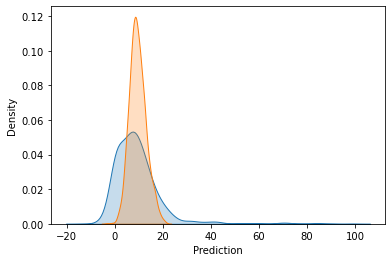

In [173]:
sns.distplot(results.Actual_Value,kde=True,hist=False,kde_kws = {'shade':True},label='Actual')
sns.distplot(results.Prediction,kde=True,hist=False,kde_kws = {'shade':True},label='Prediction')